In [1]:
import pandas as pd
cols = ['Wavelet','skewness','curtosis','entropy','Target']

In [2]:
df = pd.read_csv("D:\OneDrive - NITT\Custom_Download\data_banknote_authentication.txt",
                header=None,names=cols)

In [3]:
df

,Wavelet,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
X = df.drop('Target',axis=1)
y = df['Target']

# Step-1

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Step-2

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

# Step-3

In [7]:
def get_details(clf):
    # Return the depth of the decision tree.
    print('Depth:',clf.get_depth())

    # Return the number of leaves of the decision tree.
    print('Number of leaves:',clf.get_n_leaves())

    # Return the feature importances.
    print('Feature importances',clf.feature_importances_)

    print('Train score:',clf.score(X_train,y_train)) # train score

    print('Test score:',clf.score(X_test,y_test)) # test score

In [8]:
get_details(clf1)

Depth: 7
Number of leaves: 27
Feature importances [0.60767458 0.23853366 0.1344064  0.01938536]
Train score: 1.0
Test score: 0.9781420765027322


# Step-4

In [9]:
clf2 = DecisionTreeClassifier(random_state=42,max_depth=10)
clf2.fit(X_train,y_train)
get_details(clf2)

Depth: 7
Number of leaves: 27
Feature importances [0.60767458 0.23853366 0.1344064  0.01938536]
Train score: 1.0
Test score: 0.9781420765027322


# Step-5

In [10]:
clfs_score = []
for i in range(10,0,-1):
    clf3 = DecisionTreeClassifier(random_state=42,max_depth=i)
    clf3.fit(X_train,y_train)
    clfs_score.append((clf3,clf3.score(X_test,y_test)))
    print(f'**************Depth: {i} *************')
    get_details(clf3)

**************Depth: 10 *************
Depth: 7
Number of leaves: 27
Feature importances [0.60767458 0.23853366 0.1344064  0.01938536]
Train score: 1.0
Test score: 0.9781420765027322
**************Depth: 9 *************
Depth: 7
Number of leaves: 27
Feature importances [0.60767458 0.23853366 0.1344064  0.01938536]
Train score: 1.0
Test score: 0.9781420765027322
**************Depth: 8 *************
Depth: 7
Number of leaves: 27
Feature importances [0.60767458 0.23853366 0.1344064  0.01938536]
Train score: 1.0
Test score: 0.9781420765027322
**************Depth: 7 *************
Depth: 7
Number of leaves: 27
Feature importances [0.60767458 0.23853366 0.1344064  0.01938536]
Train score: 1.0
Test score: 0.9781420765027322
**************Depth: 6 *************
Depth: 6
Number of leaves: 24
Feature importances [0.60986751 0.23553871 0.14295504 0.01163874]
Train score: 0.9963547995139733
Test score: 0.9799635701275046
**************Depth: 5 *************
Depth: 5
Number of leaves: 19
Feature impo

# Step-6

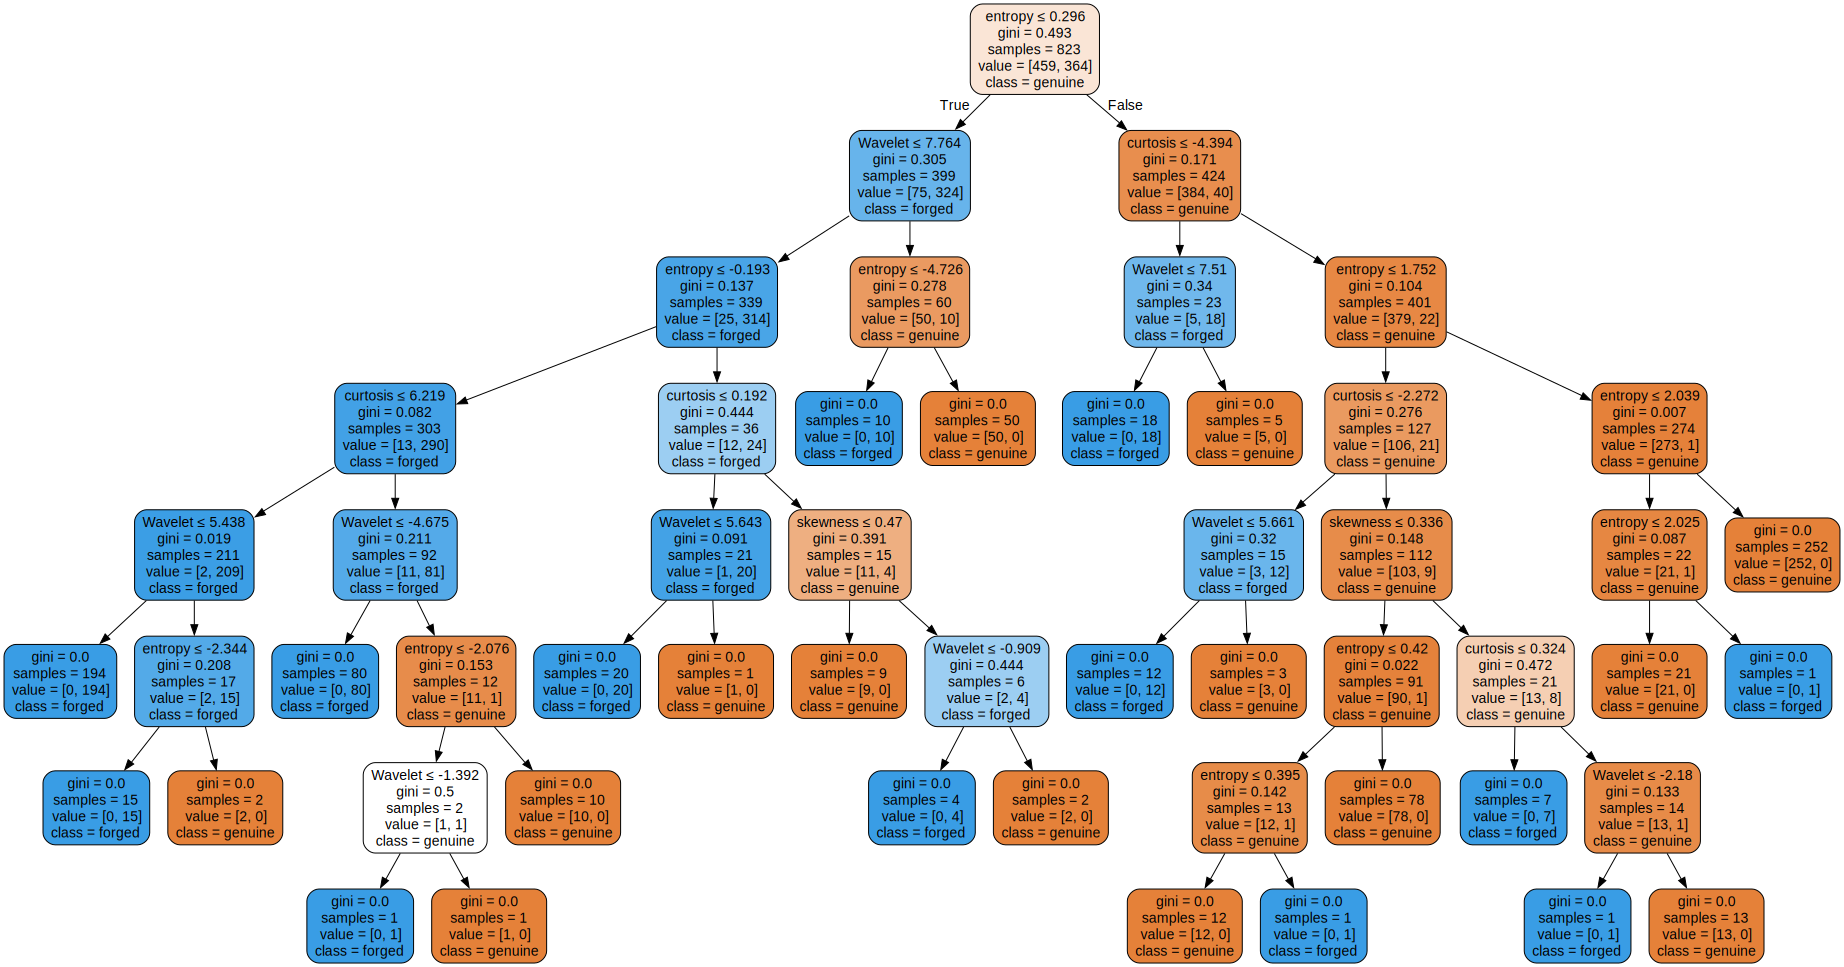

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
# from IPython.display import display
# display(graphviz.Source(tree.export_graphviz(clf1)))

dot_data = tree.export_graphviz(clf1, 
                  feature_names=list(set(cols) - set(['Target'])),
                  class_names=['genuine','forged'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

# Step-7

In [12]:
# classifier with their test score in descending order
x = sorted(clfs_score,key=lambda x:x[1],reverse=True)
x

[(DecisionTreeClassifier(max_depth=6, random_state=42), 0.9799635701275046),
 (DecisionTreeClassifier(max_depth=10, random_state=42), 0.9781420765027322),
 (DecisionTreeClassifier(max_depth=9, random_state=42), 0.9781420765027322),
 (DecisionTreeClassifier(max_depth=8, random_state=42), 0.9781420765027322),
 (DecisionTreeClassifier(max_depth=7, random_state=42), 0.9781420765027322),
 (DecisionTreeClassifier(max_depth=5, random_state=42), 0.9690346083788707),
 (DecisionTreeClassifier(max_depth=4, random_state=42), 0.9544626593806922),
 (DecisionTreeClassifier(max_depth=3, random_state=42), 0.9253187613843351),
 (DecisionTreeClassifier(max_depth=2, random_state=42), 0.8998178506375227),
 (DecisionTreeClassifier(max_depth=1, random_state=42), 0.8415300546448088)]

In [13]:
clf_high = x[0][0] # classifier having highest test score
clf_high

DecisionTreeClassifier(max_depth=6, random_state=42)

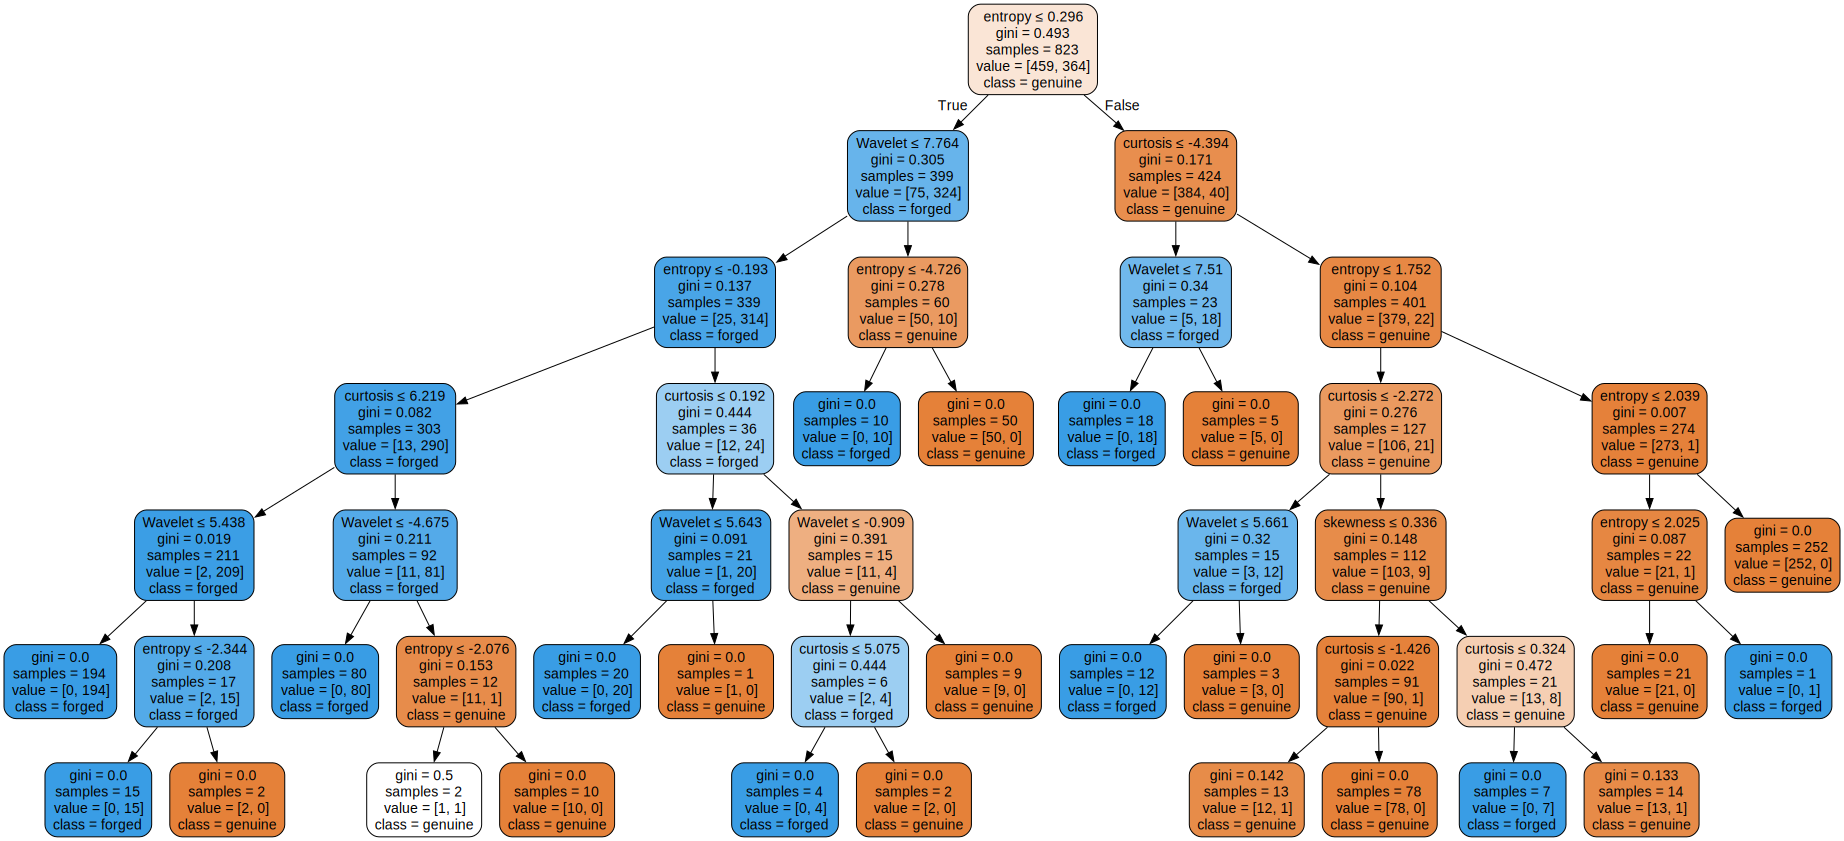

In [14]:
dot_data = tree.export_graphviz(clf_high, 
                  feature_names=list(set(cols) - set(['Target'])),
                  class_names=['genuine','forged'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph